# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Df

0.4 Defining styles and labels formats

0.5 Random sampling of 30% of data

0.6 Exploration of parents

    0.6.1 importance of this profile
            A. count of users
            B. gross sales (total_spent_in_lifetime)

   


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [8]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

In [9]:
dept_data.shape

(21, 8)

In [10]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   department                   21 non-null     category
 1   department_id                21 non-null     int8    
 2   total_items_sold_by_dept     21 non-null     int64   
 3   total_spent_in_dept          21 non-null     float32 
 4   avg_price_per_item_in_dept   21 non-null     float32 
 5   total_orders_from_dept       21 non-null     int32   
 6   avg_items_per_order_by_dept  21 non-null     float32 
 7   n_unique_items_in_dept       21 non-null     int16   
dtypes: category(1), float32(3), int16(1), int32(1), int64(1), int8(1)
memory usage: 924.0 bytes


In [11]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,17289206.00,7.736552,1180461,1.893110,4006
1,other,2,36291,253708.00,6.990934,35056,1.035229,548
2,bakery,3,1172428,9208026.00,7.853809,878658,1.334339,1515
3,produce,4,9479291,75660936.00,7.981709,2409320,3.934426,1684
4,alcohol,5,153696,1251654.25,8.143701,84689,1.814828,1054


In [12]:
dept_data.isnull().sum()

department                     0
department_id                  0
total_items_sold_by_dept       0
total_spent_in_dept            0
avg_price_per_item_in_dept     0
total_orders_from_dept         0
avg_items_per_order_by_dept    0
n_unique_items_in_dept         0
dtype: int64

### 0.4 Defining styles and label formats

In [13]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [14]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [15]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [16]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [17]:
# Define colors dark grey and forest green for plots
# colors = ['A9A9A9', '228B22']

In [18]:
# Identifying which profile we are investigating
profile = 'Parents'
profile_label = 'Parents'
not_profile_label = 'Other Users'
labels = ['Parents of Children or Teens', 'Parents of Babies', 'Other Users']
labels_r = ['Other Users', 'Parents of Babies', 'Parents of Children or Teens']
colors = ['aquamarine', 'lightseagreen', 'grey']
colors_r = ['grey', 'lightseagreen', 'aquamarine']

### 0.5 Creating a subset df with each row = 1 user and profile flag

In [19]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [20]:
df_user_subset = df[['user_id', 'loyalty_flag', 'spender_type', 'frequent_shopper', 'gender', 'age', 'n_dependants', 'fam_status', 'income', 'income_group', 'region', 'low_activity_flag', 'total_spent_in_lifetime', 'total_items_in_lifetime', 'avg_items_per_order_by_user', 'baby_parent', 'pet_owner', 'senior_citizen', 'two_parent_fam', 'single_parent']]

In [21]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
1,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
2,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
3,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
4,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False


In [22]:
df_user_subset.shape

(32434489, 20)

This has the same number of rows as the original df and only the 20 subsetted columns.

In [23]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [24]:
# Checking new shape
df_user_subset.shape

(206209, 20)

In [25]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,West,False,"1,465.60",195,13.93,False,False,True,True,False
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,West,False,721.40,88,7.33,False,False,False,True,False
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,South,False,147.70,18,3.60,False,False,False,True,False
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,West,True,340.00,37,9.25,False,False,True,False,False


Now we have a dataframe that reflects the users specifically.

In [26]:
df_user_subset.loc[df_user_subset['n_dependants'] >0, 'parent'] = profile_label
df_user_subset.loc[df_user_subset['n_dependants'] == 0, 'parent'] = not_profile_label
    

In [27]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,...,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,False,375.70,59,5.90,False,False,False,True,False,Parents
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,...,False,"1,465.60",195,13.93,False,False,True,True,False,Parents
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,...,False,721.40,88,7.33,False,False,False,True,False,Parents
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,...,False,147.70,18,3.60,False,False,False,True,False,Parents
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,...,True,340.00,37,9.25,False,False,True,False,False,Other Users


In [28]:
df_user_subset.loc[(df_user_subset['n_dependants'] >0) & (df_user_subset['baby_parent'] == True), 'profile_flag'] = 'Parents of Babies'
df_user_subset.loc[(df_user_subset['n_dependants'] >0) & (df_user_subset['baby_parent'] == False), 'profile_flag'] = 'Parents of Children or Teens'
df_user_subset.loc[df_user_subset['n_dependants'] == 0, 'profile_flag'] = not_profile_label
    


In [29]:
df_user_subset

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,...,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,parent,profile_flag
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,375.70,59,5.90,False,False,False,True,False,Parents,Parents of Children or Teens
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,...,"1,465.60",195,13.93,False,False,True,True,False,Parents,Parents of Children or Teens
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,...,721.40,88,7.33,False,False,False,True,False,Parents,Parents of Children or Teens
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,...,147.70,18,3.60,False,False,False,True,False,Parents,Parents of Children or Teens
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,...,340.00,37,9.25,False,False,True,False,False,Other Users,Other Users
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32433143,206205,New customer,Low spender,Regular customer,Female,38,2,married,99402,Middle class,...,285.10,32,10.66,True,False,False,True,False,Parents,Parents of Babies
32433175,206206,Loyal customer,Low spender,Frequent customer,Female,25,2,married,75041,Middle class,...,"2,179.30",285,4.25,False,False,False,True,False,Parents,Parents of Children or Teens
32433460,206207,Regular customer,Low spender,Frequent customer,Male,76,1,married,110135,Middle class,...,"1,630.90",223,13.94,True,False,True,True,False,Parents,Parents of Babies
32433683,206208,Loyal customer,Low spender,Frequent customer,Male,64,1,married,156838,Upper middle class,...,"5,664.20",677,13.81,True,False,False,True,False,Parents,Parents of Babies


## 0.6. Exploration of parents

In [30]:
# Finding the number of childless users
num_childless = len(df_user_subset[df_user_subset['n_dependants']==0])
num_childless

51602

In [31]:
# Finding the number of users with children
num_parents = len(df_user_subset[df_user_subset['n_dependants']!=0])
num_parents

154607

51,602 + 154,607 = 206,209 (which is our total number of users) so our numbers are correct.

In [77]:
# Create a temporary df to visualize this
list_parents = {'Other_users': [num_childless], 'Parents': [num_parents]}
df_parents = pd.DataFrame(list_parents)
df_parents = df_parents.transpose()
df_parents = df_parents.rename(columns = {0 :'Count_of_users'})
df_parents

,Count_of_users
Other_users,51602
Parents,154607


Text(0.5, 1.0, '75% of our users are parents.')

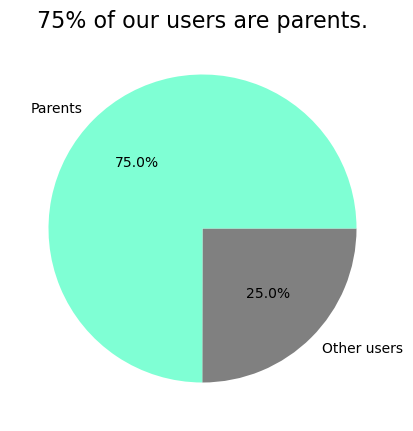

In [139]:
parent_plot = df_parents.plot.pie(y='Count_of_users', 
                            figsize=(7,5), 
                            counterclock=False, 
                            colors = ['grey', 'aquamarine'], 
                            legend=False, 
                            labels = ['Other users', 'Parents'], 
                            autopct='%1.1f%%')

plt.ylabel('')

plt.title ("75% of our users are parents.", 
           size=16)



In [140]:
# Exporting bar chart
parent_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_plot_pie.png'))

There are 154,607 parents in our user base.  Of those, 25,307 are parents of babies. 

### 0.6.1 importance of this profile

#### 0.6.1.A  count of users

In [168]:
# Create a temporary df to hold the count of the profile
num_profile = df_user_subset['profile_flag'].value_counts()

In [169]:
num_profile

Parents of Children or Teens    129300
Other Users                      51602
Parents of Babies                25307
Name: profile_flag, dtype: int64

75% of our users are parents.
12.3% of babies and the rest of children/teens

In [170]:
# Reset the index so that the correct column headers will appear
num_profile = pd.DataFrame(num_profile).reset_index()

In [171]:
num_profile

,index,profile_flag
0,Parents of Children or Teens,129300
1,Other Users,51602
2,Parents of Babies,25307


In [172]:
# Set the index to be the boolean column with a header of 'index'
num_profile.set_index('index')

,profile_flag
index,
Parents of Children or Teens,129300
Other Users,51602
Parents of Babies,25307


Text(0.5, 1.0, '75% of our users have children.')

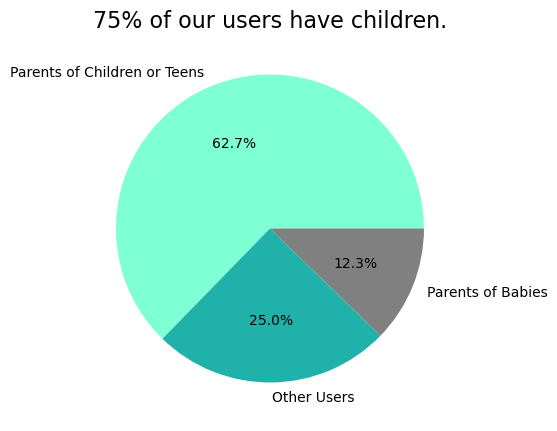

In [174]:
plot = num_profile.plot.pie(y='profile_flag', 
                            figsize=(7,5), 
                            counterclock=True, 
                            colors = ['aquamarine', 'lightseagreen', 'grey'], 
                            legend=False, 
                            labels = ['Parents of Children or Teens', 'Other Users', 'Parents of Babies'], 
                            autopct='%1.1f%%')

plt.ylabel('')

plt.title ("75% of our users have children.", 
           size=16)


In [105]:
# Reclaiming space
del num_profile

#### 0.6.1.B  gross sales (total_spent_in_lifetime)

In [175]:
# Calculate the gross sales for those in the profile and out of it
gross_sales_profile = df_user_subset.groupby('profile_flag').total_spent_in_lifetime.sum()

In [176]:
gross_sales_profile

profile_flag
Other Users                     63,068,384.00
Parents of Babies               58,564,036.00
Parents of Children or Teens   130,785,944.00
Name: total_spent_in_lifetime, dtype: float32

Parents account for 75% of gross sales, which is what we would expect.

In [177]:
# Reset the index so that the correct column headers will appear
gross_sales_profile = pd.DataFrame(gross_sales_profile).reset_index()

In [178]:
gross_sales_profile

,profile_flag,total_spent_in_lifetime
0,Other Users,"63,068,384.00"
1,Parents of Babies,"58,564,036.00"
2,Parents of Children or Teens,"130,785,944.00"


Text(0.5, 1.0, 'Gross sales by types of parents.')

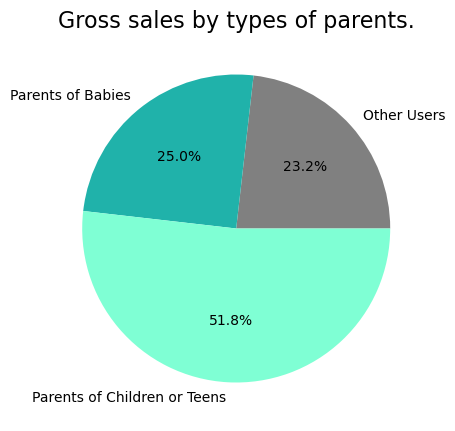

In [204]:
plot = gross_sales_profile.plot.pie(y='total_spent_in_lifetime', 
                                    figsize=(7,5), 
                                    counterclock=True, 
                                    colors=colors_r, 
                                    legend=False, 
                                    labels = labels_r, 
                                    autopct='%1.1f%%')
plt.ylabel('')

plt.title ("Gross sales by types of parents.", 
           size=16)


In [ ]:
# Perform another chart for just parents in general

In [186]:
# Calculate the gross sales for those in the profile and out of it
gross_sales_parent = df_user_subset.groupby('parent').total_spent_in_lifetime.sum()

In [187]:
gross_sales_parent

parent
Other Users    63,068,384.00
Parents       189,349,984.00
Name: total_spent_in_lifetime, dtype: float32

In [188]:
# Reset the index so that the correct column headers will appear
gross_sales_parent = pd.DataFrame(gross_sales_parent).reset_index()

In [191]:
# Swap the order of the rows so that the pie chart renders correctly
temp = pd.DataFrame()
temp = gross_sales_parent.copy()

In [192]:
gross_sales_parent.iloc[0] = temp.iloc[1].copy()
gross_sales_parent.iloc[1] = temp.iloc[0].copy()

In [193]:
# Confirming the swap happened correctly
gross_sales_parent

,parent,total_spent_in_lifetime
0,Parents,"189,349,984.00"
1,Other Users,"63,068,384.00"


Text(0.5, 1.0, 'Gross sales by parents.')

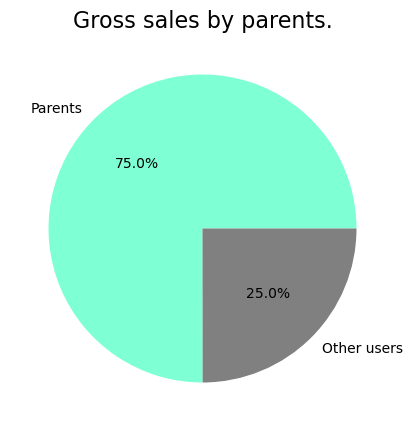

In [197]:
parent_gross_plot = gross_sales_parent.plot.pie(y='total_spent_in_lifetime', 
                                    figsize=(7,5), 
                                    counterclock=True, 
                                    colors=['aquamarine', 'grey'], 
                                    legend=False, 
                                    labels = ['Parents', 'Other users'], 
                                    autopct='%1.1f%%')
plt.ylabel('')

plt.title ("Gross sales by parents.", 
           size=16)

In [198]:
# Create filename for export
filename = profile+'_gross_sales_overlay2_pie.png'

In [199]:
filename

'Parents_gross_sales_overlay2_pie.png'

In [200]:
# Exporting bar chart
parent_gross_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [80]:
# Create filename for export
filename = profile+'_gross_sales_pie.png'

In [81]:
filename

'baby_parent_gross_sales_pie.png'

In [82]:
# Exporting bar chart
plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [83]:
# Reclaiming space
del gross_sales_profile
del temp